In [2]:
import pandas as pd
from sklearn.preprocessing import RobustScaler
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt


data = pd.read_csv('../DATASET/Hasil_Gabungan.csv')

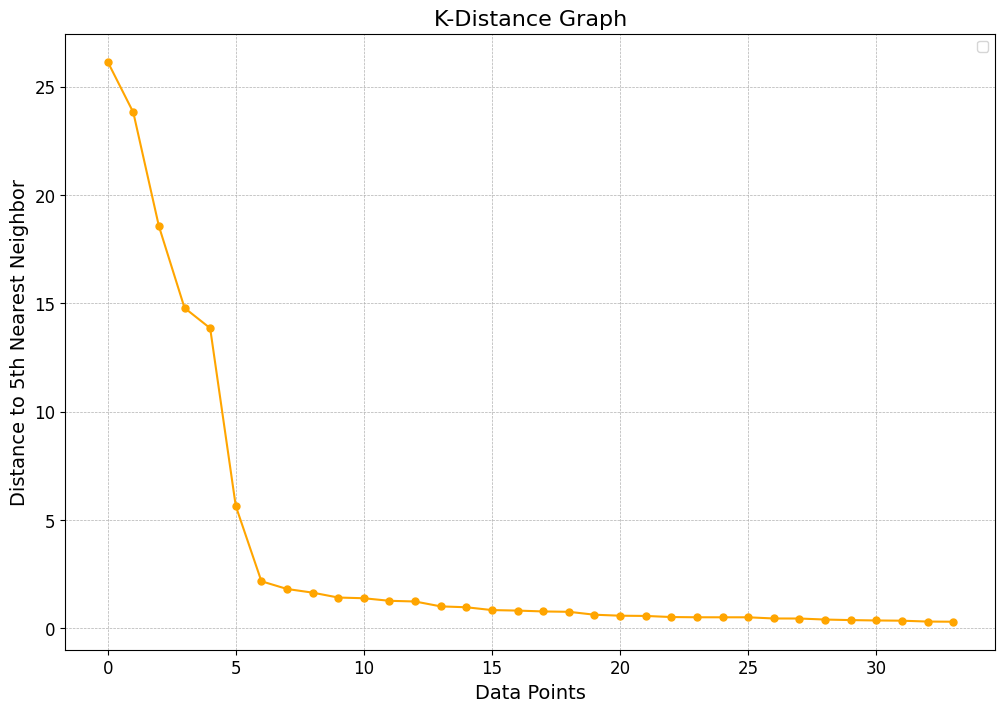


Provinsi yang masuk dalam Cluster 0:
['Aceh', 'Sumatera Utara', 'Sumatera Barat', 'Riau', 'Kep. Riau', 'Sumatera Selatan', 'Jambi', 'Bengkulu', 'Kep. Bangka Belitung', 'Lampung', 'Kalimantan Barat', 'Kalimantan Selatan', 'Kalimantan Tengah', 'Sulawesi Utara', 'Gorontalo', 'Sulawesi Tengah', 'Sulawesi Selatan', 'Sulawesi Tenggara', 'Sulawesi Barat', 'Maluku', 'Maluku Utara', 'Papua', 'Papua Barat', 'Bali', 'Nusa Tenggara Barat', 'Nusa Tenggara Timur', 'DI Yogyakarta', 'Kalimantan Timur', 'Kalimantan Utara']

Provinsi yang masuk dalam Cluster -1:
['Jawa Timur', 'Jawa Tengah', 'Jawa Barat', 'Banten', 'DKI Jakarta']

Jumlah cluster yang ditemukan: 1
Jumlah outlier: 5


In [3]:
features = ['Residential_2021', 'Business_2021', 'Industrial_2021', 'Social_2021', 'Gov_Office_2021', 'Pub_Street_2021', 'Total_2021', 'JP_2021', 'KP_2021']

data_T2021 = data[features]
scaler = RobustScaler()
scaled_features = scaler.fit_transform(data_T2021)

neighbors = NearestNeighbors(n_neighbors=5)
neighbors_fit = neighbors.fit(scaled_features)
distances, indices = neighbors_fit.kneighbors(scaled_features)

distances = sorted(distances[:,4], reverse=True)

plt.figure(figsize=(12, 8))
plt.plot(distances, color='orange', linestyle='-', marker='o', markersize=5)
plt.title("K-Distance Graph", fontsize=16)
plt.xlabel("Data Points", fontsize=14)
plt.ylabel("Distance to 5th Nearest Neighbor", fontsize=14)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.legend()

plt.show()

dbscan = DBSCAN(eps=6, min_samples=16)
clusters = dbscan.fit_predict(scaled_features)
data['Cluster'] = clusters

provinsi_cluster = data[['Province', 'Cluster']]

for cluster in set(clusters):
    print(f"\nProvinsi yang masuk dalam Cluster {cluster}:")
    print(provinsi_cluster[provinsi_cluster['Cluster'] == cluster]['Province'].to_list())


num_clusters = len(set(clusters)) - (1 if -1 in clusters else 0)  
num_outliers = list(clusters).count(-1)  

print(f"\nJumlah cluster yang ditemukan: {num_clusters}")
print(f"Jumlah outlier: {num_outliers}")

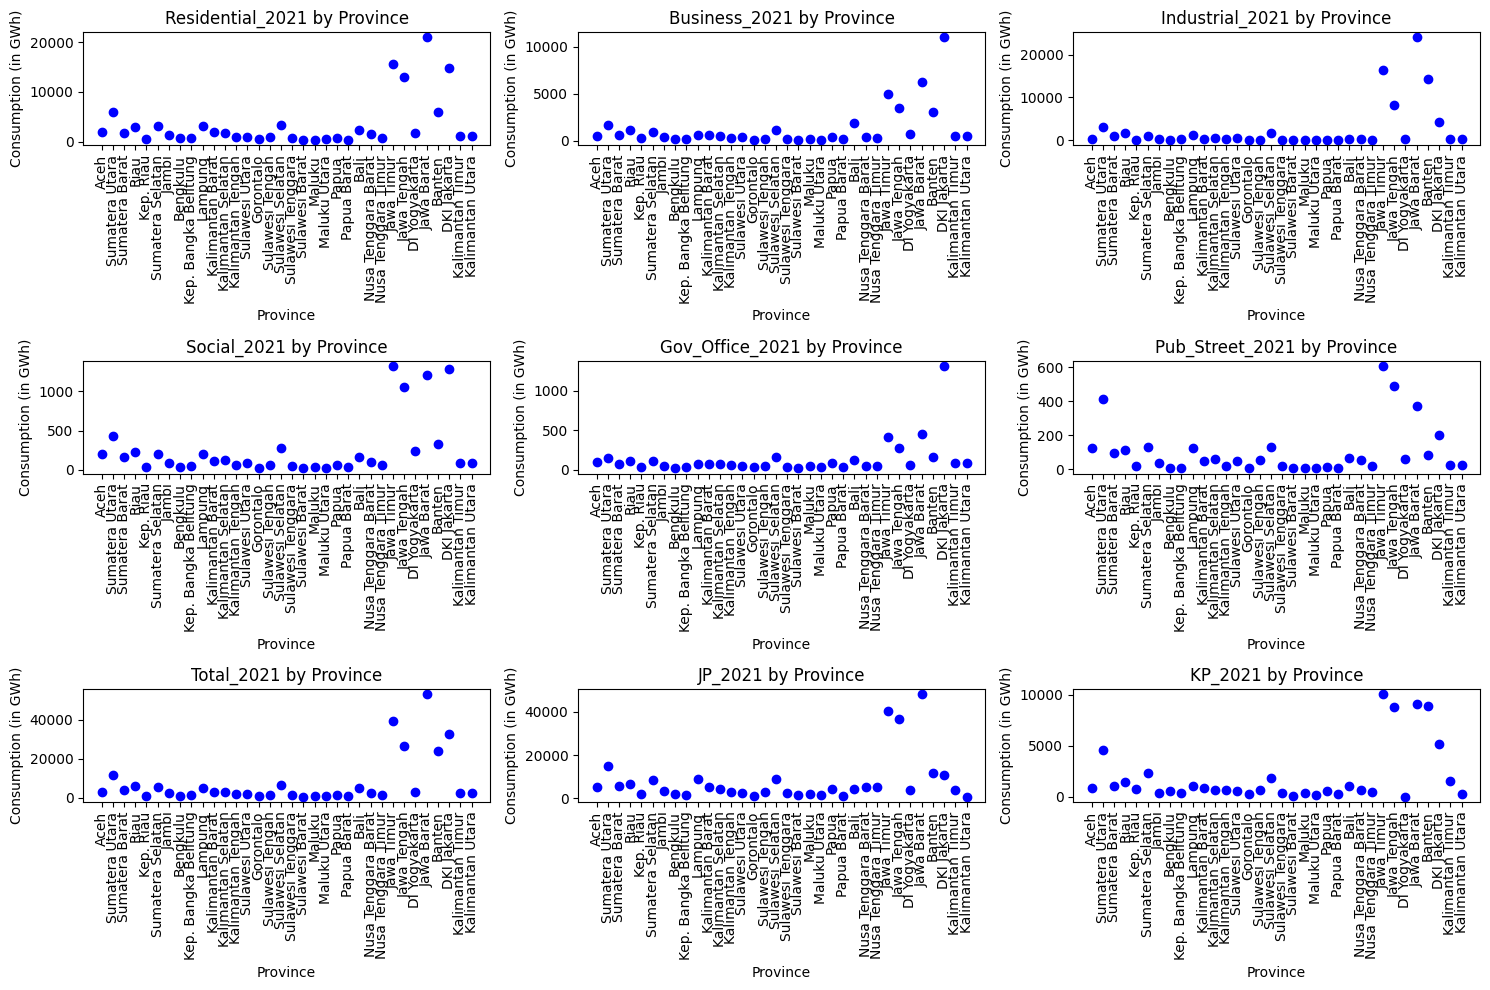

In [4]:
num_plots = len(features)
cols = 3
rows = (num_plots // cols) + (1 if num_plots % cols != 0 else 0)

fig, axes = plt.subplots(rows, cols, figsize=(15, 10))
axes = axes.flatten()

for i, feature in enumerate(features):
    axes[i].scatter(data['Province'], data[feature], color='blue', marker='o')
    axes[i].set_title(f'{feature} by Province', fontsize=12)
    axes[i].set_xlabel('Province', fontsize=10)
    axes[i].set_ylabel('Consumption (in GWh)', fontsize=10)
    axes[i].tick_params(axis='x', rotation=90)

for i in range(num_plots, len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()

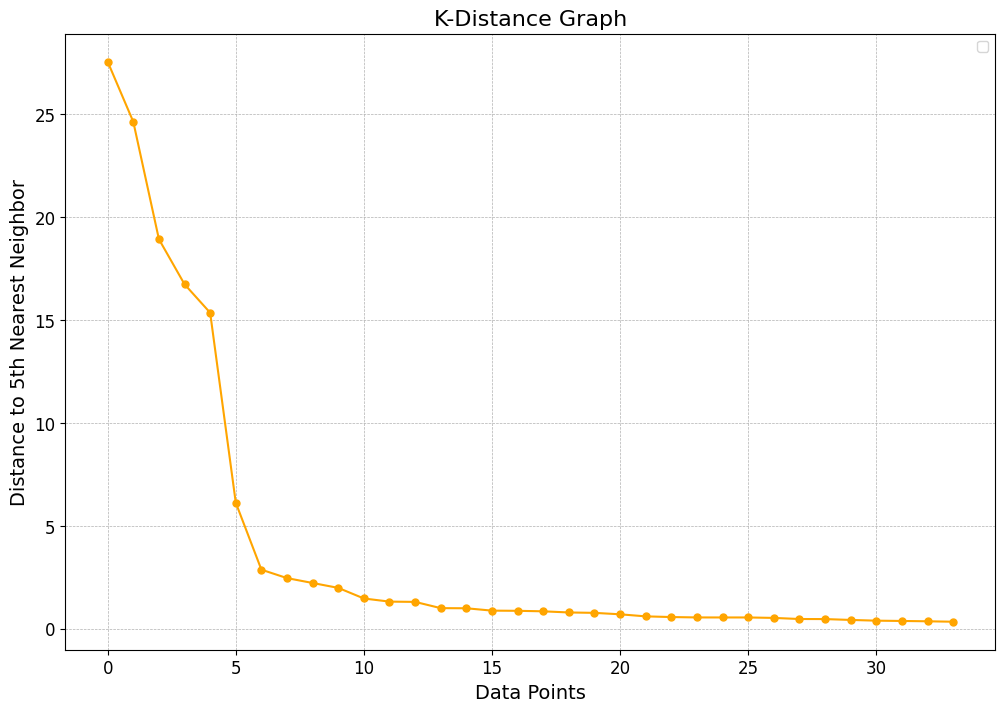


Provinsi yang masuk dalam Cluster 0:
['Aceh', 'Sumatera Utara', 'Sumatera Barat', 'Riau', 'Kep. Riau', 'Sumatera Selatan', 'Jambi', 'Bengkulu', 'Kep. Bangka Belitung', 'Lampung', 'Kalimantan Barat', 'Kalimantan Selatan', 'Kalimantan Tengah', 'Sulawesi Utara', 'Gorontalo', 'Sulawesi Tengah', 'Sulawesi Selatan', 'Sulawesi Tenggara', 'Sulawesi Barat', 'Maluku', 'Maluku Utara', 'Papua', 'Papua Barat', 'Bali', 'Nusa Tenggara Barat', 'Nusa Tenggara Timur', 'DI Yogyakarta', 'Kalimantan Timur', 'Kalimantan Utara']

Provinsi yang masuk dalam Cluster -1:
['Jawa Timur', 'Jawa Tengah', 'Jawa Barat', 'Banten', 'DKI Jakarta']

Jumlah cluster yang ditemukan: 1
Jumlah outlier: 5


In [5]:
features = ['Residential_2022', 'Business_2022', 'Industrial_2022', 'Social_2022', 'Gov_Office_2022', 'Pub_Street_2022', 'Total_2022', 'JP_2022', 'KP_2022']

data_T2022 = data[features]

robust_scaler2 = RobustScaler()
data_scaled_2022 = robust_scaler2.fit_transform(data_T2022)

neighbors2 = NearestNeighbors(n_neighbors=5)
neighbors_fit2 = neighbors2.fit(data_scaled_2022)
distances2, indices = neighbors_fit2.kneighbors(data_scaled_2022)

distances2 = sorted(distances2[:,4], reverse=True)

plt.figure(figsize=(12, 8))
plt.plot(distances2, color='orange', linestyle='-', marker='o', markersize=5)
plt.title("K-Distance Graph", fontsize=16)
plt.xlabel("Data Points", fontsize=14)
plt.ylabel("Distance to 5th Nearest Neighbor", fontsize=14)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.legend()

plt.show()

dbscan2 = DBSCAN(eps=6, min_samples=16)
clusters2 = dbscan2.fit_predict(data_scaled_2022)
data['Cluster'] = clusters2

provinsi_cluster2 = data[['Province', 'Cluster']]

for cluster in set(clusters2):
    print(f"\nProvinsi yang masuk dalam Cluster {cluster}:")
    print(provinsi_cluster2[provinsi_cluster2['Cluster'] == cluster]['Province'].to_list())


num_clusters = len(set(clusters)) - (1 if -1 in clusters else 0)  
num_outliers = list(clusters).count(-1)  

print(f"\nJumlah cluster yang ditemukan: {num_clusters}")
print(f"Jumlah outlier: {num_outliers}")

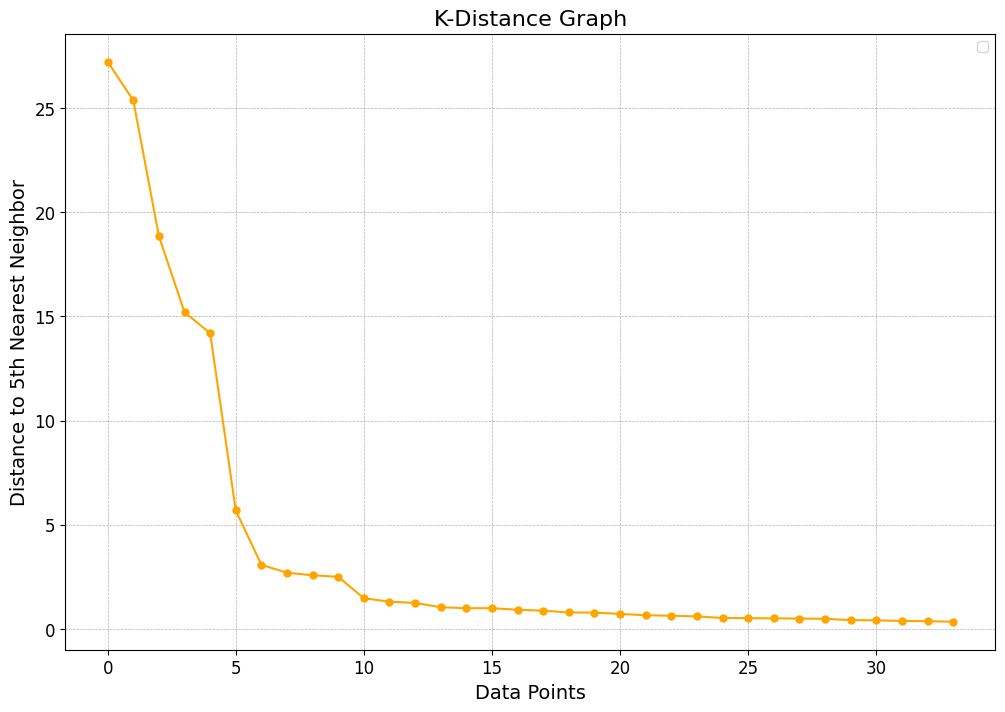


Provinsi yang masuk dalam Cluster 0:
['Aceh', 'Sumatera Utara', 'Sumatera Barat', 'Riau', 'Kep. Riau', 'Sumatera Selatan', 'Jambi', 'Bengkulu', 'Kep. Bangka Belitung', 'Lampung', 'Kalimantan Barat', 'Kalimantan Selatan', 'Kalimantan Tengah', 'Sulawesi Utara', 'Gorontalo', 'Sulawesi Tengah', 'Sulawesi Selatan', 'Sulawesi Tenggara', 'Sulawesi Barat', 'Maluku', 'Maluku Utara', 'Papua', 'Papua Barat', 'Bali', 'Nusa Tenggara Barat', 'Nusa Tenggara Timur', 'DI Yogyakarta', 'Kalimantan Timur', 'Kalimantan Utara']

Provinsi yang masuk dalam Cluster -1:
['Jawa Timur', 'Jawa Tengah', 'Jawa Barat', 'Banten', 'DKI Jakarta']

Jumlah cluster yang ditemukan: 1
Jumlah outlier: 5


In [6]:
features = ['Residential', 'Business', 'Industrial', 'Social', 'Gov_Office', 'Pub_Street', 'Total', 'JP_2023', 'KP_2023']

data_T2023 = data[features]

robust_scaler3 = RobustScaler()
data_scaled_2023 = robust_scaler3.fit_transform(data_T2023)

neighbors3 = NearestNeighbors(n_neighbors=5)
neighbors_fit3 = neighbors3.fit(data_scaled_2023)
distances3, indices = neighbors_fit3.kneighbors(data_scaled_2023)

distances3 = sorted(distances3[:,4], reverse=True)

plt.figure(figsize=(12, 8))
plt.plot(distances3, color='orange', linestyle='-', marker='o', markersize=5)
plt.title("K-Distance Graph", fontsize=16)
plt.xlabel("Data Points", fontsize=14)
plt.ylabel("Distance to 5th Nearest Neighbor", fontsize=14)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.legend()

plt.show()

dbscan3 = DBSCAN(eps=6, min_samples=16)

clusters3 = dbscan3.fit_predict(data_scaled_2023)
data['Cluster'] = clusters3

provinsi_cluster3 = data[['Province', 'Cluster']]

for cluster in set(clusters3):
    print(f"\nProvinsi yang masuk dalam Cluster {cluster}:")
    print(provinsi_cluster3[provinsi_cluster3['Cluster'] == cluster]['Province'].to_list())


num_clusters = len(set(clusters)) - (1 if -1 in clusters else 0)  
num_outliers = list(clusters).count(-1)  

print(f"\nJumlah cluster yang ditemukan: {num_clusters}")
print(f"Jumlah outlier: {num_outliers}")

In [7]:
from sklearn.metrics import silhouette_score

sil_score_2021 = silhouette_score(scaled_features, clusters)
print(f"Silhouette Score untuk Tahun 2021: {sil_score_2021}")

sil_score_2022 = silhouette_score(data_scaled_2022, clusters2)
print(f"Silhouette Score untuk Tahun 2022: {sil_score_2022}")

sil_score_2023 = silhouette_score(data_scaled_2023, clusters3)
print(f"Silhouette Score untuk Tahun 2032: {sil_score_2023}")

Silhouette Score untuk Tahun 2021: 0.8133220488555215
Silhouette Score untuk Tahun 2022: 0.8116370248906389
Silhouette Score untuk Tahun 2032: 0.8052039869077368


In [8]:
import folium
import geopandas as gpd

geo_data = gpd.read_file('../DATASET/id.json')

geo_data['name'] = geo_data['name'].replace('Jakarta Raya', 'DKI Jakarta')
geo_data['name'] = geo_data['name'].replace('Kepulauan Riau', 'Kep. Riau')
geo_data['name'] = geo_data['name'].replace('Yogyakarta', 'DI Yogyakarta')
geo_data['name'] = geo_data['name'].replace('Bangka-Belitung', 'Kep. Bangka Belitung')
geo_data['name'] = geo_data['name'].replace('North Kalimantan', 'Kalimantan Utara')

merged_data = geo_data.merge(data, left_on='name', right_on='Province')

m = folium.Map(location=[-6.1751, 106.8650], zoom_start=5)

cluster_colors = {
    1: 'blue',  
    0: 'green', 
    -1: 'red'    
}

for cluster in merged_data['Cluster'].unique():
    cluster_data = merged_data[merged_data['Cluster'] == cluster]

    for _, row in cluster_data.iterrows():
        folium.Marker(
            location=[row['geometry'].centroid.y, row['geometry'].centroid.x],
            popup=row['name'],
            icon=folium.Icon(color=cluster_colors[cluster])
        ).add_to(m)


m



In [9]:
import leafmap as lf
import geopandas as gpd

geo_data = gpd.read_file('../DATASET/id.json')

geo_data['name'] = geo_data['name'].replace('Jakarta Raya', 'DKI Jakarta')
geo_data['name'] = geo_data['name'].replace('Kepulauan Riau', 'Kep. Riau')
geo_data['name'] = geo_data['name'].replace('Yogyakarta', 'DI Yogyakarta')
geo_data['name'] = geo_data['name'].replace('Bangka-Belitung', 'Kep. Bangka Belitung')
geo_data['name'] = geo_data['name'].replace('North Kalimantan', 'Kalimantan Utara')

merged_data = geo_data.merge(data, left_on='name', right_on='Province')

m = lf.Map(center=[-6.1751, 106.8650], zoom=5)

cluster_colors = {
    1: 'blue',  
    0: 'green', 
    -1: 'red'    
}

for cluster in merged_data['Cluster'].unique():
    cluster_data = merged_data[merged_data['Cluster'] == cluster]

    cluster_data['color'] = cluster_data['Cluster'].map(cluster_colors)

    m.add_gdf(cluster_data, layer_name=f"Cluster {cluster}", color_col="color")

m.add_layer_control()

m

Map(center=[-6.1751, 106.865], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title', 'zo…